In [ ]:
import pandas as pd
import numpy as np
import random
import statistics
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier ;
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Bước 1: Đọc dữ liệu
df = pd.read_csv('data.csv', sep=',')

# Bước 2: Loại bỏ cột ID nếu có
if 'building_id' in df.columns:
    df = df.drop(columns=['building_id'])

# Bước 3: Xác định X và y
X = df.drop(columns=['labels'])
y = df['labels']

# Bước 4: One-hot encoding
X = pd.get_dummies(X)

# Bước 5: Tách tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bước 6: Huấn luyện Naive Bayes + đo thời gian huấn luyện
start_train = time.time()
model = KNeighborsClassifier(n_neighbors=13)
model.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# Bước 7: Dự đoán + đo thời gian test
start_test = time.time()
y_pred = model.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

# Bước 8: Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # hoặc 'macro' nếu bạn muốn tính đều các lớp
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Bước 9: In kết quả
print("Kết quả đánh giá mô hình KNN:") # Note: The print statement mentions "Decision Tree" but the code uses KNeighborsClassifier
print(f"Accuracy:  {accuracy:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Thời gian huấn luyện: {training_time:.4f} giây")
print(f"Thời gian test:       {testing_time:.4f} giây")

# from sklearn.decomposition import PCA

# #Giảm chiều dữ liệu để trực quan hóa (chỉ dùng cho trực quan, không dùng để huấn luyện)
# pca = PCA(n_components=2)
# X_test_pca = pca.fit_transform(X_test)

# # Trực quan hóa nhãn thực tế
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='Set2', alpha=0.7, edgecolor='k')
# plt.title("Phân phối dữ liệu tập test sau PCA - theo nhãn thực")
# plt.xlabel("Thành phần chính 1")
# plt.ylabel("Thành phần chính 2")
# plt.legend(title='Label')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Trực quan hóa nhãn dự đoán
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='Set1', alpha=0.7, edgecolor='k')
# plt.title("Phân phối dữ liệu tập test sau PCA - theo nhãn dự đoán")
# plt.xlabel("Thành phần chính 1")
# plt.ylabel("Thành phần chính 2")
# plt.legend(title='Predicted')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Kết quả đánh giá mô hình KNN:
Accuracy:  0.6527
F1-score:  0.6437
Precision: 0.6469
Recall:    0.6527
Thời gian huấn luyện: 0.0698 giây
Thời gian test:       103.1802 giây


# Mục mới

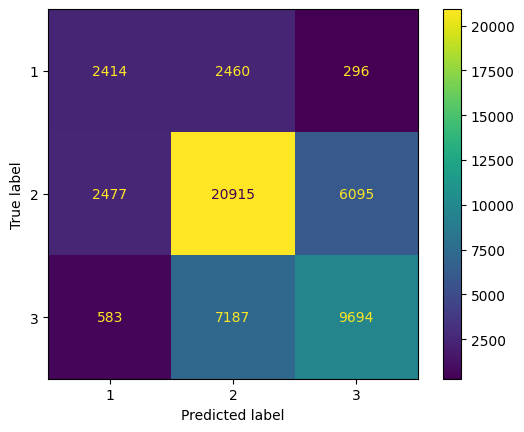

In [ ]:
y_DuDoan = model.predict(X_test)
label = [1,2,3]#??
cm = confusion_matrix(y_test, y_DuDoan, labels=label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot()
plt.show()

In [ ]:
accuracy_array = []
f1_array = []
recall_array = []
precision_array = []
time_train = []
time_test = []
for k_neighbour in range (1, 20):
    X_np = np.array(X)
    Y_np = np.array(y)
    combined = list(zip(X_np, Y_np))
    random.shuffle(combined)
    X_shuffled, Y_shuffled = zip(*combined)
    X_train, X_test, Y_train, Y_test = train_test_split(X_shuffled, Y_shuffled, test_size=0.2, random_state=10)

    start_time = time.time()
    model = KNeighborsClassifier(n_neighbors=k_neighbour) # Corrected parameter name
    model.fit(X_train, Y_train)
    end_time = time.time()
    time_train.append(end_time - start_time)
    #Caucht time test
    start_time = time.time()
    Y_DuDoan = model.predict(X_test)
    end_time = time.time()
    time_test.append(end_time - start_time)
    KetQua_DoChinhXac = accuracy_score(Y_test,Y_DuDoan)
    f1 = f1_score(Y_test, Y_DuDoan, average='weighted')
    print(f1)
    recall = recall_score(Y_test, Y_DuDoan, average='weighted')
    precision = precision_score(Y_test, Y_DuDoan, average='weighted')
    f1_array.append(f1)
    recall_array.append(recall)
    precision_array.append(precision)
    print("Độ chính xác của k={}: {}".format(k_neighbour,KetQua_DoChinhXac))
    accuracy_array.append(KetQua_DoChinhXac)
Ketqua_KNN = statistics.mean(accuracy_array)
F1_KNN = statistics.mean(f1_array)
Recall_KNN = statistics.mean(recall_array)
Precision_KNN = statistics.mean(precision_array)
TimeTest_KNN = statistics.mean(time_test)
TimeTrain_KNN = statistics.mean(time_train)
print("Accuracy:   ", Ketqua_KNN)
print("F1:         ", F1_KNN)
print("Recall:     ", Recall_KNN)
print("Precision:  ", Precision_KNN)
print("Time train: ", TimeTrain_KNN)
print("Time test:  ", TimeTest_KNN)

0.6660595051543502
Độ chính xác của k=1: 0.6663724794228814
0.6738205310451938
Độ chính xác của k=2: 0.6795725331440302
0.6919030349842721
Độ chính xác của k=3: 0.6928493313635579
0.6969853346271634
Độ chính xác của k=4: 0.7029796051495558
0.7041387029945408
Độ chính xác của k=5: 0.7075267166784981
0.7022278829656387
Độ chính xác của k=6: 0.707967997544176
0.7064812435241044
Độ chính xác của k=7: 0.7107883578595959
0.7028902420101716
Độ chính xác của k=8: 0.7091383511444523
0.7035905564546144
Độ chính xác của k=9: 0.7083517200360699
0.7046901132597618
Độ chính xác của k=10: 0.7114790583450049
0.7020993309875763
Độ chính xác của k=11: 0.7075267166784981
0.703382124539531
Độ chính xác của k=12: 0.7103662631185127
0.706056511313822
Độ chính xác của k=13: 0.711977897584467
0.7002555440837952
Độ chính xác của k=14: 0.7075842750522822
0.7011400501168711
Độ chính xác của k=15: 0.70741159993093
0.6969224966597208
Độ chính xác của k=16: 0.7048214731106464
0.6964964213438415
Độ chính xác của k=1

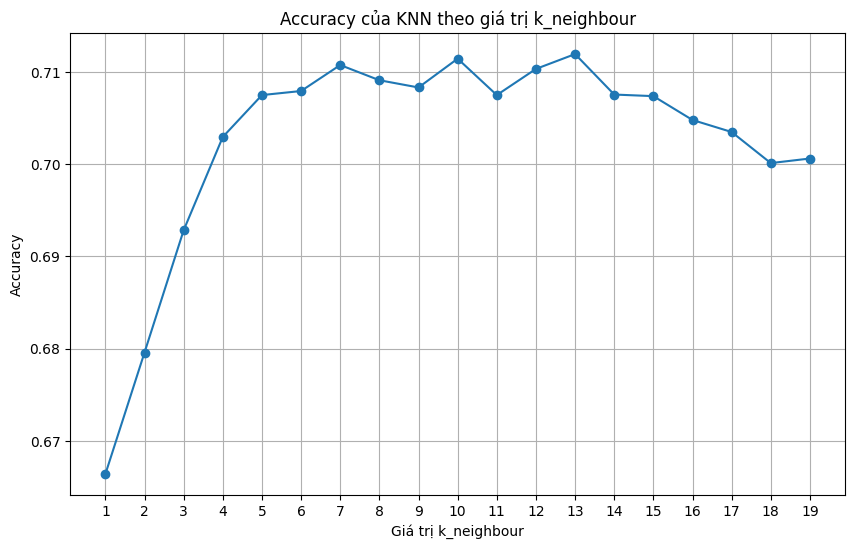

In [3]:
# Trực quan hóa độ chính xác theo k_neighbour
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), accuracy_array, marker='o', linestyle='-')
plt.title('Accuracy của KNN theo giá trị k_neighbour')
plt.xlabel('Giá trị k_neighbour')
plt.ylabel('Accuracy')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()